In [4]:
%pylab inline
import networkx as nx
import scipy as sp
import scipy

Populating the interactive namespace from numpy and matplotlib


In [119]:
edges=np.loadtxt("edges.txt",dtype=np.int32)
nodes=np.loadtxt("nodes.txt",dtype=np.int32)
G=nx.Graph()

for i in range(4):
    G.add_nodes_from(nodes[nodes[:,1]==i][:,0],labels=i)
G.add_edges_from(edges)

In [112]:
values= [node[1]['labels'] for node in G.nodes(data=True)]

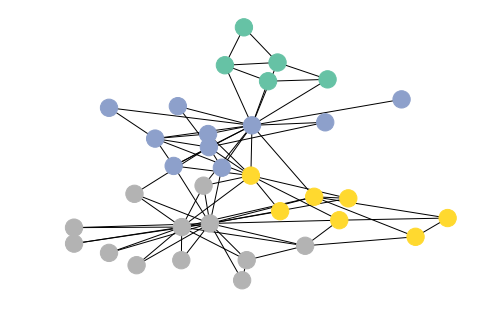

In [118]:
nx.draw_spring(G, cmap=plt.get_cmap('Set2'), node_color=values)

In [138]:
def normalized_A(G):
    A = nx.to_scipy_sparse_matrix(G,format='csr')
    I=scipy.sparse.eye(A.shape[0])
    n,m = A.shape
    diags = A.sum(axis=1).flatten()
    D = scipy.sparse.spdiags(diags, [0], m, n, format='csr')
    AH=A+I
    with scipy.errstate(divide='ignore'):
           diags_sqrt = 1.0/scipy.sqrt(diags)
    diags_sqrt[scipy.isinf(diags_sqrt)] = 0
    DH = scipy.sparse.spdiags(diags_sqrt, [0], m, n, format='csr')
    normalized_A=DH.dot(AH.dot(DH))
    return normalized_A

In [165]:
def ReLU(x):
    return np.maximum(x, 0)

num_layers=3
num_input_features=34
num_output_features=34
num_nodes=G.number_of_nodes()
H=[np.random.randn(num_nodes,num_input_features) for i in range(num_layers+1)]
W=[np.random.randn(num_output_features,num_output_features) for i in range(num_layers)]


In [166]:
NA=normalized_A(G)
H[0]=np.eye(num_nodes)
for i in range(num_layers):
    H[i+1]=ReLU(NA@H[i]@W[i])

In [168]:
H[3]

array([[21.15173388,  8.32471914, 13.09985343, ...,  5.03388109,
         4.62858139, 25.00170661],
       [16.58508535, 11.76195274,  5.63362208, ...,  8.05023279,
         3.51628917, 21.77843056],
       [16.5910969 , 11.31369926,  5.83852596, ...,  8.91797619,
         3.88701925, 22.28817473],
       ...,
       [12.60079327,  2.94174761, 15.41505341, ...,  0.        ,
         2.81318177,  4.70187682],
       [17.87124119, 10.78655944, 17.03650942, ...,  3.37667045,
        15.49896593,  8.64630793],
       [17.96208844, 12.09867475, 16.05445414, ...,  2.19274889,
        17.5078473 ,  6.26332934]])

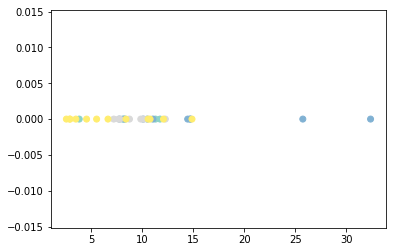

In [167]:
plt.scatter(H[3][:,1],H[2][:,0],c=values,cmap='Set3')

In [169]:
from sklearn.manifold import TSNE

In [171]:
H_embedded = TSNE(n_components=2).fit_transform(H[3])

In [173]:
H_embedded.shape

(34, 2)

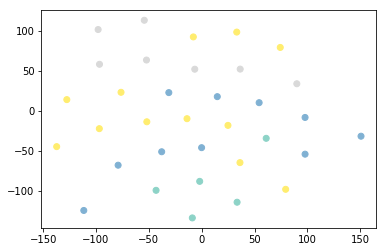

In [174]:
plt.scatter(H_embedded[:,1],H_embedded[:,0],c=values,cmap='Set3')